In [23]:
#cleaned data hajara 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('bank.csv', sep=';')

# checking for null values
df.isna().sum() # no null values found 

# checking for duplicates
df.duplicated().sum() # no duplicates found

X = df.drop(columns="y")
y = df['y'].map({'yes':1, "no":0})

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude='object').columns.tolist()

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)
print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

df['poutcome'].value_counts()

df.info()

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
<class 'pandas.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   str  
 2   marital    4521 non-null   str  
 3   education  4521 non-null   str  
 4   default    4521 non-null   str  
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   str  
 7   loan       4521 non-null   str  
 8   contact    4521 non-null   str  
 9   day        4521 non-null   int64
 10  month      4521 non-null   str  
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   str  
 16  y       

/var/folders/9_/hpdl1k6s4f174xlr8mvpqt7r0000gn/T/ipykernel_5038/166748510.py:17: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = X.select_dtypes(include=['object']).columns.tolist()


In [24]:
#implementing random forest classifier
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
#import warnings warnings.filterwarnings('ignore')

#spliting into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_classifier.fit(X_train, y_train) #train the model 

y_pred = rf_classifier.predict(X_test) #make predictions on the test set

#evaluate 
accuracy_rf = accuracy_score(y_test, y_pred) 
cm_rf = confusion_matrix(y_test, y_pred)
classification_rep_rf = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy_rf:.4f}')
print(f'\nConfusion Matrix:\n{cm_rf}')
print(f'\nClassification Report:\n{classification_rep_rf}')

Accuracy: 0.9028

Confusion Matrix:
[[792  15]
 [ 73  25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.62      0.26      0.36        98

    accuracy                           0.90       905
   macro avg       0.77      0.62      0.65       905
weighted avg       0.88      0.90      0.88       905



feature: age, score: 0.0044
feature: job, score: 0.0004
feature: marital, score: 0.0044
feature: education, score: 0.0009
feature: default, score: 0.0004
feature: balance, score: 0.0051
feature: housing, score: 0.0038
feature: loan, score: -0.0015
feature: contact, score: 0.0013
feature: day, score: 0.0044
feature: month, score: 0.0077
feature: duration, score: 0.0358
feature: campaign, score: 0.0002
feature: pdays, score: 0.0053
feature: previous, score: 0.0015
feature: poutcome, score: 0.0066


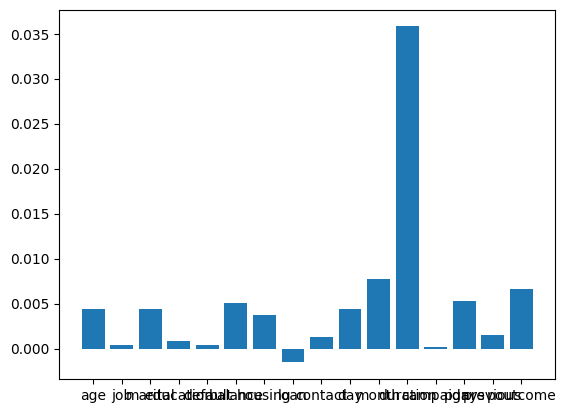

In [25]:
#permutation feature importance 
from sklearn.inspection import permutation_importance

results = permutation_importance(rf_classifier, X_test, y_test, scoring='accuracy')
for i, v in enumerate(results.importances_mean): 
    print(f'feature: {X.columns[i]}, score: {v:.4f}')

#visualize feature importance
plt.bar([X.columns[i] for i in range(len(results.importances_mean))], results.importances_mean)
plt.show()

In [ ]:
#implementing binomial logistic regression
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', LogisticRegression(max_iter=10000, random_state=42))
])

logreg.fit(X_train, y_train) #train model 

#pred 
y_pred_logreg = logreg.predict(X_test)

#evaluate 
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)

print(f'Logistic Regression Accuracy: {accuracy_logreg:.4f}')
print(f'\nConfusion Matrix:\n{cm_logreg}')
print(f'\nClassification Report:\n{classification_rep_logreg}')

Logistic Regression Accuracy: 0.9017

Confusion Matrix:
[[789  18]
 [ 71  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



feature: age, score: 0.0000
feature: job, score: 0.0027
feature: marital, score: 0.0020
feature: education, score: 0.0000
feature: default, score: 0.0015
feature: balance, score: 0.0000
feature: housing, score: 0.0000
feature: loan, score: -0.0004
feature: contact, score: 0.0040
feature: day, score: 0.0029
feature: month, score: 0.0027
feature: duration, score: 0.0334
feature: campaign, score: 0.0022
feature: pdays, score: 0.0007
feature: previous, score: 0.0000
feature: poutcome, score: 0.0088


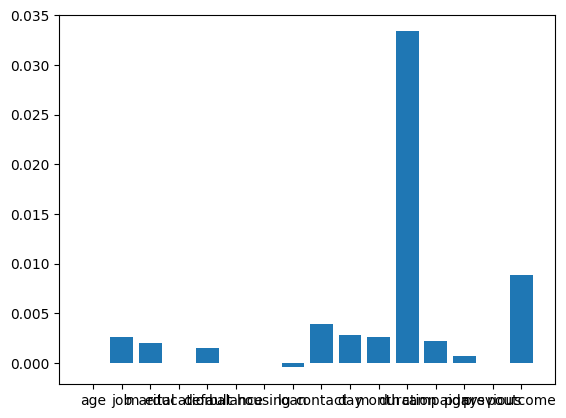

In [27]:
#permutation feature importance 
results = permutation_importance(logreg, X_test, y_test, scoring='accuracy')
for i, v in enumerate(results.importances_mean): 
    print(f'feature: {X.columns[i]}, score: {v:.4f}')

#visualize feature importance
plt.bar([X.columns[i] for i in range(len(results.importances_mean))], results.importances_mean)
plt.show()